## Detector training process

In [1]:
import os, sys
import pickle as pkl
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
%load_ext autoreload
%autoreload 2
PIPELINE_ROOT =  Path().resolve().parent.parent
sys.path.append(PIPELINE_ROOT.as_posix())
print(PIPELINE_ROOT)
#from library.cell_extractor.cell_detector_base import CellDetectorBase
from library.cell_extractor.cell_detector_trainer import CellDetectorTrainerDK55, CellDetectorTrainer
from library.cell_extractor.cell_detector import CellDetector
from library.cell_extractor.cell_predictor import GreedyPredictor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/eddyod/programming/pipeline/src


In [4]:
def detection_plot(detections, labeled_data, title):
    fig = plt.figure(figsize=(8,5))
    # ax = fig.add_subplot(1, 1, 1)
    sns.kdeplot(x=detections['mean_score'], color='r')
    plt.yscale('log')
    plt.ylim([1e-6,1])
    plt.xlabel("Average value of Scores")
    # plt.legend(loc='upper left')
    left_yaxis = plt.gca().get_yaxis()
    left_yaxis.label.set_color('red')
    left_yaxis.set_tick_params(labelcolor='red', color='red')

    ax2 = plt.twinx()
    labeled_data.loc[labeled_data['label']==0, 'label'] = 'Negative'
    labeled_data.loc[labeled_data['label']==1, 'label'] = 'Positive'
    sns.scatterplot(x=labeled_data['mean_score'], y=labeled_data['std_score'],hue=labeled_data['label'],s=5,alpha=0.7)
    plt.title('Distributions of Detections of %s'%title)
    # plt.xlabel("Mean of Scores")
    plt.ylabel("Standard Deviation of Scores", rotation=270, labelpad=20)
    plt.ylim([0,5])
    plt.xlim([-25,15])
    plt.vlines(-1.5,ymin=0,ymax=5,ls='--',colors='k',label='Negative-unsure threshold')
    plt.vlines(1.5,ymin=0,ymax=5,ls='--',colors='k',label='Sure-unsure threshold')
    plt.text(0, 0.3, 'Unsure', ha='center', va='center')
    plt.text(8.25, 0.3, 'Sure', ha='center', va='center')
    plt.text(-8.25, 0.3, 'Negative', ha='center', va='center')
    legend = plt.legend(loc='upper right')
    legend.get_frame().set_alpha(0.5)
    plt.grid()
    plt.gca().spines['left'].set_color('red')
    # plt.savefig(f'/scratch/k1qian/Output/{title}_Distribution.eps', format='eps')
    plt.show()
        

In [6]:
# Detector 1
generator = CellDetectorTrainerDK55('DK55',round=1,segmentation_threshold=2000)
train_features = generator.load_refined_original_feature()

{'eta': 0.3, 'objective': 'binary:logistic', 'nthread': 7}
skipping, min distance 52.49761899362675
skipping, min distance 34.48187929913333
skipping, min distance 42.2965719651132
skipping, min distance 27.892651361962706
skipping, min distance 20.8806130178211
skipping, min distance 27.80287754891569
skipping, min distance 26.248809496813376
skipping, min distance 28.635642126552707
skipping, min distance 69.85699678629192
skipping, min distance 21.18962010041709
skipping, min distance 36.345563690772494
skipping, min distance 30.610455730027933
skipping, min distance 40.19950248448356
skipping, min distance 49.64876634922564
skipping, min distance 93.02150289046077
skipping, min distance 20.248456731316587
skipping, min distance 24.758836806279895
skipping, min distance 26.40075756488817
skipping, min distance 37.0
skipping, min distance 30.59411708155671
skipping, min distance 85.0881895447306
skipping, min distance 20.248456731316587
skipping, min distance 29.068883707497267
skipp

skipping, min distance 58.69412236331676
skipping, min distance 30.4138126514911
skipping, min distance 48.703182647543684
skipping, min distance 33.95585369269929
skipping, min distance 25.238858928247925
skipping, min distance 60.8276253029822
skipping, min distance 20.8806130178211
skipping, min distance 38.3275357934736
skipping, min distance 28.284271247461902
skipping, min distance 29.206163733020468
skipping, min distance 35.77708763999664
skipping, min distance 36.40054944640259
skipping, min distance 60.166435825965294
skipping, min distance 39.01281840626232
skipping, min distance 32.55764119219941
skipping, min distance 26.019223662515376
skipping, min distance 41.182520563948
skipping, min distance 59.033888572581766
skipping, min distance 22.825424421026653
skipping, min distance 31.144823004794873
skipping, min distance 27.202941017470888
skipping, min distance 33.97057550292606
skipping, min distance 72.12489168102785
skipping, min distance 41.6293165929973
skipping, min

{'eta': 0.3, 'objective': 'binary:logistic', 'nthread': 7}
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 41) (59095,) (118190, 41)
(59095, 41) (59095, 4

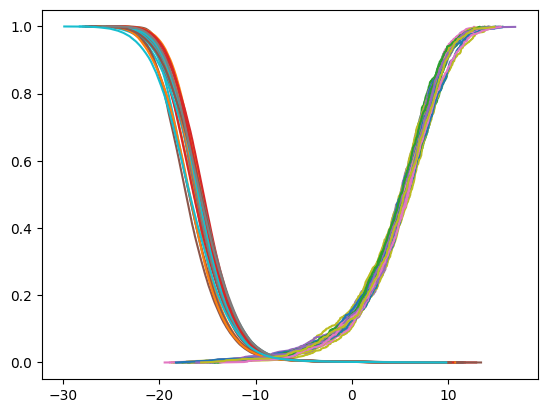

In [7]:
trainer = CellDetectorTrainer('DK55',round=1)
new_models = trainer.train_classifier(train_features,676,3) # training iteration = 676, depth of XGBoost trees = 3
trainer.save_models(new_models)

In [11]:
detector = CellDetector('DK41',round=1)
# detector.detector.model = pkl.load(open('/scratch/k1qian/Cell_Detectors/detectors_new.pkl', 'rb'))
detector.calculate_and_save_detection_results()

creating combined features
   label   area  height  width  corr_CH1  energy_CH1  corr_CH3  energy_CH3  \
0      0  24322     185    331  0.427438   -0.102380  0.647215   -0.115384   
1      0      1       1      1  0.501611    0.210173  0.245967    0.075459   
2      0      2       2      1  0.203397    0.097614 -0.084538   -0.102403   
3      0      1       1      1  0.307858    0.154662 -0.167806   -0.065634   
4      0      1       1      1  0.272149    0.118552 -0.136580   -0.074368   

   m00_mask  m10_mask  ...  nu03_mask   h0_mask   h1_mask   h2_mask  \
0    6166.0  250322.0  ...  -0.000708  0.165633  0.000174  0.000062   
1       1.0      40.0  ...   0.000000  0.000000  0.000000  0.000000   
2       2.0      80.0  ...   0.000000  0.125000  0.015625  0.000000   
3       1.0      40.0  ...   0.000000  0.000000  0.000000  0.000000   
4       1.0      40.0  ...   0.000000  0.000000  0.000000  0.000000   

        h3_mask       h4_mask       h5_mask       h6_mask  contrast1  \
0  8.

In [ ]:
detections = detector.load_detections()
sures = detections[detections.predictions>0]
unsures = detections[detections.predictions==0]
len(sures),len(unsures)

In [ ]:
generator = CellDetectorTrainer('DK55',round=2,disk = '/net/birdstore/Active_Atlas_Data/')
train_features = generator.load_refined_original_feature()

In [ ]:
detector = CellDetector('DK55',round=1,disk = '/net/birdstore/Active_Atlas_Data/')
detector.detector = pkl.load(open('/net/birdstore/Active_Atlas_Data/cell_segmentation/detectors/detector_round_1.pkl', 'rb'))
scores,labels,_mean,_std = detector.detector.calculate_scores(train_features)
train_features['mean_score'],train_features['std_score'] = _mean,_std

## Prepare training samples for Detector 2

In [ ]:
detector = CellDetector('DK55',round=1)
scores,labels,_mean,_std = detector.detector.calculate_scores(train_features)
train_features['mean_score'],train_features['std_score'] = _mean,_std

In [ ]:
train_features.head()

In [ ]:
train_features[(train_features['mean_score']>1.5) & (train_features['label']==1)]

In [ ]:
detections = detector.load_detections()
sures = detections[detections.predictions==2]
unsures = detections[detections.predictions==0]
len(sures),len(unsures)

In [ ]:
features = detector.get_combined_features_for_detection()
scores,labels,_mean,_std = detector.detector.calculate_scores(features)

In [ ]:
detection_df = detector.get_combined_features()
detection_df['mean_score'],detection_df['std_score'] = _mean,_std
all_segment = np.array([detection_df.col,detection_df.row,detection_df.section]).T

In [ ]:
test_counts,train_sections = pkl.load(open('/net/birdstore/Active_Atlas_Data/cell_segmentation/DK55/features/categories_round1.pkl','rb'))
original = train_sections['original training set after mind change']
original = np.array([[ci[1]['x'],ci[1]['y'],ci[1]['section']] for ci in original])
original_index = generator.find_cloest_neighbor_among_points(all_segment,original)

In [ ]:
neg = 'DK55_premotor_manual_negative_round1_2021-12-09.csv'
pos = 'DK55_premotor_manual_positive_round1_2021-12-09.csv'
neg = pd.read_csv(neg,header=None).to_numpy()
pos = pd.read_csv(pos,header=None).to_numpy()
positive = generator.find_cloest_neighbor_among_points(all_segment,pos)
negative = generator.find_cloest_neighbor_among_points(all_segment,neg)
len(positive),len(negative)

In [ ]:
sure = list(detection_df[detection_df['mean_score']>1.5].index)

In [ ]:
len(list(set(sure).difference(set(original_index+positive+negative))))

In [ ]:
len(list(set(sure) & set(original_index+positive+negative)))

In [ ]:
len(set(sure_id+original_index+positive)), len(sure_id+original_index+positive)

In [ ]:
sure_id = [index for index in sure if index not in original_index+positive+negative]
dirs=glob('/net/birdstore/Active_Atlas_Data/cell_segmentation/DK55/CH3/*/DK55*.csv') 
manual_sections = [int(i.split('/')[-2]) for i in dirs]
labels = np.zeros(len(features))
positive_index = sure_id+original_index+positive
for i in positive_index:
    labels[i] = 1
include = [labels[i]==1 or i in negative or all_segment[i,2] in manual_sections for i in range(len(features))]


In [ ]:
features['label'] = labels

In [ ]:
detection_df['label'] = labels

In [ ]:
train_features_r2 = features[include]

In [ ]:
train_features_r2

In [ ]:
pkl.dump(train_features_r2, open('/scratch/k1qian/TrainingData_v2/round2_training_features.pkl', 'wb'))

## Detector 2

In [ ]:
trainer = CellDetectorTrainer('DK55',round=2)
new_models = trainer.train_classifier(train_features_r2,676,3)
trainer.save_models(new_models)

In [ ]:
detector = CellDetector('DK41',round=2)
# detector.detector.model = pkl.load(open('/scratch/k1qian/Cell_Detectors/detectors_new.pkl', 'rb'))
detector.calculate_and_save_detection_results()

In [ ]:
detector = CellDetector('DK41',round=2)

In [ ]:
detections = detector.load_detections()
sures = detections[detections.predictions==2]
unsures = detections[detections.predictions==0]
len(sures),len(unsures)

In [ ]:
train_features_r2 = pkl.load(open('/scratch/k1qian/TrainingData_v2/round2_training_features.pkl', 'rb'))

In [ ]:
detector = CellDetector('DK55',round=2)
scores,labels,_mean,_std = detector.detector.calculate_scores(train_features_r2)
train_features_r2['mean_score'],train_features_r2['std_score'] = _mean,_std

In [ ]:
detection_plot(detections, train_features_r2, 'Detector2')

## Detector 3

In [ ]:
train_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round2_training_features.pkl', 'rb'))
features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round3_training_features.pkl', 'rb'))
train_features_r3 = pd.concat([features,train_features])

In [ ]:
trainer = CellDetectorTrainer('DK41',round=3)
new_models = trainer.train_classifier(train_features_r3,676,3)
trainer.save_models(new_models)

In [ ]:
detector = CellDetector('DK62',round=3)
# detector.detector.model = pkl.load(open('/scratch/k1qian/Cell_Detectors/detectors_new.pkl', 'rb'))
detector.calculate_and_save_detection_results()

In [ ]:
detections = detector.load_detections()
sures = detections[detections.predictions==2]
unsures = detections[detections.predictions==0]
len(sures),len(unsures)

In [ ]:
detector = CellDetector('DK41',round=3)
scores,labels,_mean,_std = detector.detector.calculate_scores(features)
features['mean_score'],features['std_score'] = _mean,_std

In [ ]:
detection_plot(detections, features, 'Detector3')

## Detector 4

In [ ]:
train_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round2_training_features.pkl', 'rb'))
features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round3_training_features.pkl', 'rb'))
train_features = pd.concat([features,train_features])
features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round4_training_features.pkl','rb'))
train_features_r4 = pd.concat([features,train_features])

In [ ]:
trainer = CellDetectorTrainer('DK41',round=4)
new_models = trainer.train_classifier(train_features_r4,676,3)
trainer.save_models(new_models)

In [ ]:
detector = CellDetector('DK62',round=4)
# detector.detector.model = pkl.load(open('/scratch/k1qian/Cell_Detectors/detectors_new.pkl', 'rb'))
detector.calculate_and_save_detection_results()

## Detector 5

In [ ]:
old_train_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round2_training_features.pkl','rb'))
train_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round3_training_features.pkl','rb'))
train_features = pd.concat([old_train_features,train_features])
nega_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round4_training_features.pkl','rb'))
train_features = pd.concat([train_features,nega_features])
qc_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/DK62_QC_features.pkl','rb'))
qc_features = pd.concat([qc_features]*4)
train_features = pd.concat([train_features,qc_features])
beth_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/DK62_beth_features.pkl','rb'))
train_features = pd.concat([train_features,beth_features])


In [ ]:
trainer = CellDetectorTrainer('DK41',round=5)
new_models = trainer.train_classifier(train_features,676,3)
trainer.save_models(new_models)

In [ ]:
detector = CellDetector('DK62',round=5)
# detector.detector.model = pkl.load(open('/scratch/k1qian/Cell_Detectors/detectors_new.pkl', 'rb'))
detector.calculate_and_save_detection_results()

In [ ]:
detections = detector.load_detections()
sures = detections[detections.predictions==2]
unsures = detections[detections.predictions==0]
len(sures),len(unsures)

## Detector 6

In [ ]:
old_train_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round2_training_features.pkl','rb'))
train_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round3_training_features.pkl','rb'))
train_features = pd.concat([old_train_features,train_features])
nega_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/round4_training_features.pkl','rb'))
train_features = pd.concat([train_features,nega_features])
qc_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/DK62_QC_features.pkl','rb'))
qc_features = pd.concat([qc_features]*4)
train_features = pd.concat([train_features,qc_features])
beth_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/DK62_beth_features.pkl','rb'))
train_features = pd.concat([train_features,beth_features])
qc_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/DK50_QC_features.pkl','rb'))
qc_features = pd.concat([qc_features]*4)
train_features = pd.concat([train_features,qc_features])
beth_features = pkl.load(open('/scratch/k1qian/TrainingData_v2/DK50_beth_features.pkl','rb'))
train_features = pd.concat([train_features,beth_features])


In [ ]:
trainer = CellDetectorTrainer('DK41',round=6)
new_models = trainer.train_classifier(train_features,676,3)
trainer.save_models(new_models)

In [ ]:
detector = CellDetector('DK62',round=6)
# detector.detector.model = pkl.load(open('/scratch/k1qian/Cell_Detectors/detectors_new.pkl', 'rb'))
detector.calculate_and_save_detection_results()

In [ ]:
detections = detector.load_detections()
sures = detections[detections.predictions==2]
unsures = detections[detections.predictions==0]
len(sures),len(unsures)